<a href="https://colab.research.google.com/github/ChanchalSaha48/CIFAR-10-image-Classification/blob/main/CIFAR_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Libraries

In [1]:
import tensorflow as tf

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout

In [3]:
from tensorflow.keras.datasets import cifar10

In [4]:
from tensorflow.keras.utils import to_categorical

Load dataset

In [5]:
(x_train,y_train),(x_test,y_test)=cifar10.load_data()

Normalize data

In [6]:
x_train=x_train.astype('float32')/255

In [7]:
x_test=x_test.astype('float32')/255

One-hot encode the labels

In [8]:
y_train=to_categorical(y_train,10)

In [9]:
y_test=to_categorical(y_test,10)

Build a cnn model

In [10]:
model=Sequential([
    Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)),
    MaxPooling2D((2,2)),
    Conv2D(64,kernel_size=3,activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(64,activation='relu'),
    Dropout(0.5),
    Dense(10,activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


compile model

In [11]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy']
              )

In [15]:
history=model.fit(x_train,y_train,epochs=10,batch_size=64,validation_split=0.2)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 53s 84ms/step - accuracy: 0.6610 - loss: 0.9614 - val_accuracy: 0.6783 - val_loss: 0.9293
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 79s 80ms/step - accuracy: 0.6630 - loss: 0.9522 - val_accuracy: 0.6750 - val_loss: 0.9379
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 50s 81ms/step - accuracy: 0.6743 - loss: 0.9215 - val_accuracy: 0.6946 - val_loss: 0.8907
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 86s 87ms/step - accuracy: 0.6817 - loss: 0.8963 - val_accuracy: 0.6947 - val_loss: 0.8876
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 78s 81ms/step - accuracy: 0.6855 - loss: 0.8804 - val_accuracy: 0.6965 - val_loss: 0.8818
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 50s 80ms/step - accuracy: 0.6886 - loss: 0.8648 - val_accuracy: 0.7014 - val_loss: 0.8715
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 80ms/step - accuracy: 0.6960 - loss: 0.8447 - val_accuracy: 0.6983 - val_loss: 0.8814
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 80ms/step - accuracy: 0.7003 - loss: 0.8246 - 

In [17]:
test_los,test_ac=model.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.7051 - loss: 0.8910


In [18]:
print(f"Accuracy: {test_ac:.4f}")

Accuracy: 0.6976


In [22]:
import matplotlib.pyplot as plt

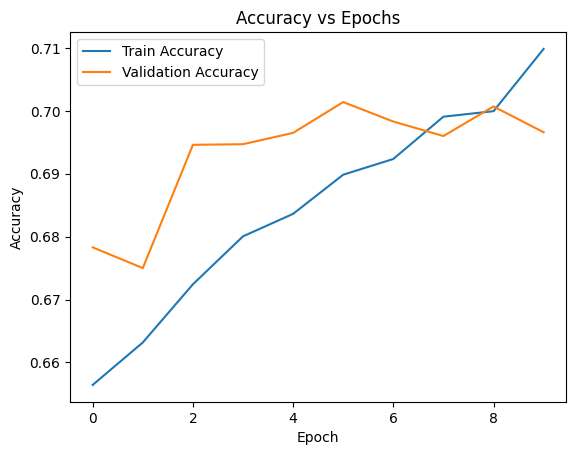

In [23]:
plt.plot(history.history['accuracy'],label='Train Accuracy')
plt.plot(history.history['val_accuracy'],label='Validation Accuracy')
plt.title('Accuracy vs Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

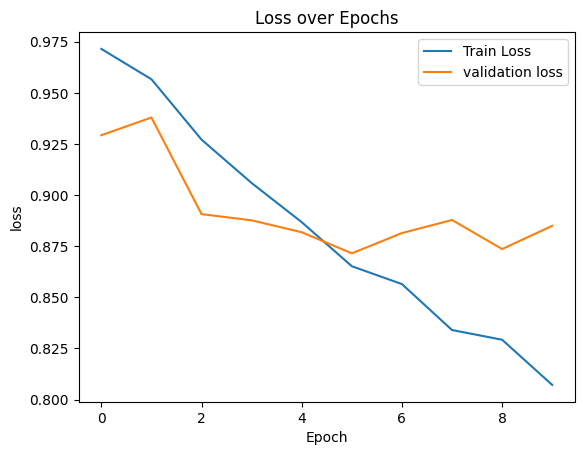

In [25]:
plt.plot(history.history['loss'],label='Train Loss')
plt.plot(history.history['val_loss'],label='validation loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

In [26]:
import numpy as np


In [27]:
predictions=model.predict(x_test[:10])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


In [28]:
predicted_classes=np.argmax(predictions,axis=1)

In [29]:
true_classes=np.argmax(y_test[:10],axis=1)

In [30]:
class_name=[
    'airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck'
]

In [31]:
plt.figure(figsize=(12,4))

<Figure size 1200x400 with 0 Axes>

<Figure size 1200x400 with 0 Axes>

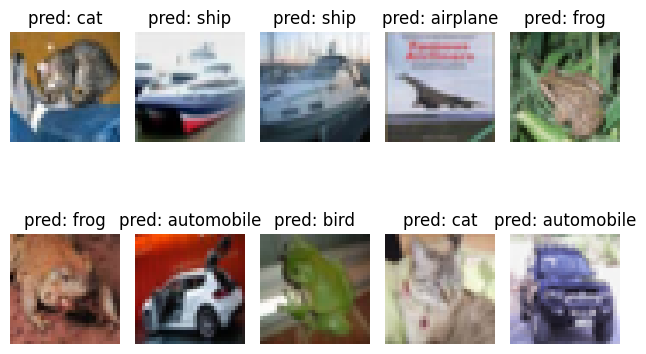

In [34]:
for i in range(10):
  plt.subplot(2,5,i+1)
  plt.imshow(x_test[i])
  plt.title(f'pred: {class_name[predicted_classes[i]]}')
  plt.axis('off')

plt.tight_layout()
plt.show()

# Confusion matrix

313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 21ms/step


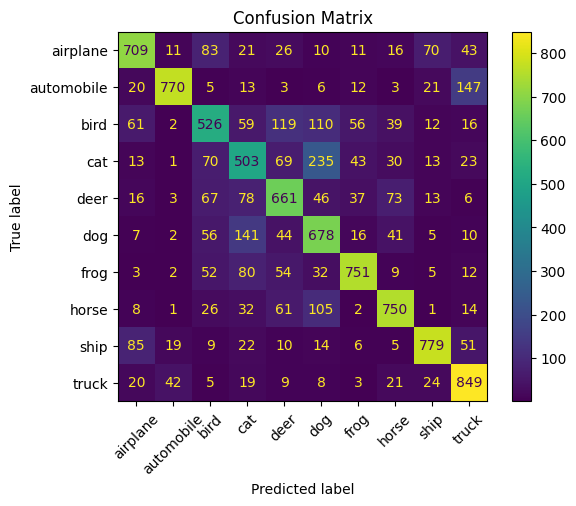

In [38]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Predict all
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_name)
disp.plot(xticks_rotation=45)
plt.title("Confusion Matrix")
plt.grid(False)
plt.show()
